In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [7]:
print(f"connected with: ",device)

connected with:  cuda


#(few step that we should take)
#1: Collect data
#2: Preprocess the data
#3: convert data into batches
#4: train_test_split
#5: Build Model
#6: Test Model
#7: Reports or visualization of the model
#8: Save the model

In [8]:
#connect with google_drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
#Data Collection
path = "/content/drive/MyDrive/Colab Notebooks/IMG_CLASSES"

for i in os.listdir(path):
  print(i)

1. Atopic Dermatitis - 1.25k
4. Tinea Ringworm Candidiasis and other Fungal Infections - 1.7k
2. Seborrheic Keratoses and other Benign Tumors - 1.8k
0. Eczema 1677
3. Psoriasis pictures Lichen Planus and related diseases - 2k


In [22]:

import os

input_path = []
labels = []
base_path = "/content/drive/MyDrive/Colab Notebooks/IMG_CLASSES"

for classs in os.listdir(base_path):
  #check te following classes
    if classs in ['0. Eczema 1677', '1. Atopic Dermatitis - 1.25k',"2. Seborrheic Keratoses and other Benign Tumors - 1.8k","3. Psoriasis pictures Lichen Planus and related diseases - 2k","4. Tinea Ringworm Candidiasis and other Fungal Infections - 1.7k"]:
        class_path = os.path.join(base_path, classs)  # Full path to class directory

        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)
            input_path.append(img_path)

            # Assign labels: crospond disease
            if classs == '0. Eczema 1677':
                labels.append(0)
            elif classs == '1. Atopic Dermatitis - 1.25k':
                labels.append(1)
            elif classs == "2. Seborrheic Keratoses and other Benign Tumors - 1.8k":
                labels.append(2)
            elif classs == "3. Psoriasis pictures Lichen Planus and related diseases - 2k" :
                labels.append(3)
            elif classs == "4. Tinea Ringworm Candidiasis and other Fungal Infections - 1.7k":
                labels.append(4)



In [25]:
len(labels)

8538

In [26]:
import pandas
df = pd.DataFrame()
df['input_path'] = input_path
df['labels'] = labels

In [27]:
df.shape

(8538, 2)

In [28]:
df["labels"].value_counts()

,count
labels,
3,2055
2,1847
4,1702
0,1677
1,1257


In [29]:
#save the data
df.to_csv("data.csv",index=False)

In [30]:
#shuffle the data
df = df.sample(frac=1).reset_index(drop=True)

In [32]:
df.sample(10)

,input_path,labels
2517,/content/drive/MyDrive/Colab Notebooks/IMG_CLA...,2
8257,/content/drive/MyDrive/Colab Notebooks/IMG_CLA...,1
1954,/content/drive/MyDrive/Colab Notebooks/IMG_CLA...,0
1284,/content/drive/MyDrive/Colab Notebooks/IMG_CLA...,2
3847,/content/drive/MyDrive/Colab Notebooks/IMG_CLA...,2
1440,/content/drive/MyDrive/Colab Notebooks/IMG_CLA...,3
2484,/content/drive/MyDrive/Colab Notebooks/IMG_CLA...,0
533,/content/drive/MyDrive/Colab Notebooks/IMG_CLA...,4
2272,/content/drive/MyDrive/Colab Notebooks/IMG_CLA...,2
7566,/content/drive/MyDrive/Colab Notebooks/IMG_CLA...,0


In [38]:
df.info()
df["labels"] = df["labels"].astype("str")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8538 entries, 0 to 8537
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   input_path  8538 non-null   object
 1   labels      8538 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 133.5+ KB


<Axes: xlabel='labels'>

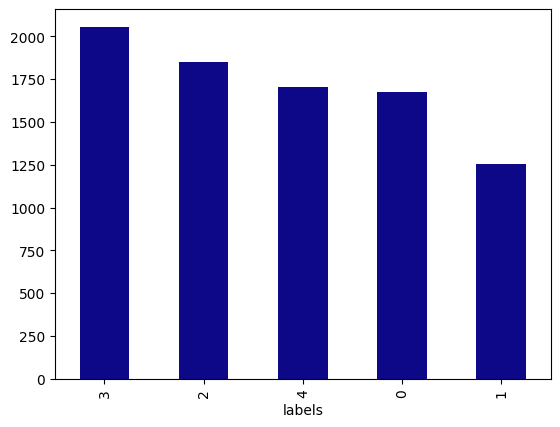

In [39]:
#visualization
df["labels"].value_counts().plot(kind="bar",cmap="plasma")

In [41]:
#now check teh images of diffrent disease
Eczema=df[df['labels']=="0"]["input_path"].sample(25)
Atopic_Dermatitis=df[df['labels']=="1"]["input_path"].sample(25)
Seborrheic_Keratoses=df[df['labels']=="2"]["input_path"].sample(25)
Psoriasis_pictures=df[df['labels']=="3"]["input_path"].sample(25)
Tinea_Ringworm=df[df['labels']=="4"]["input_path"].sample(25)

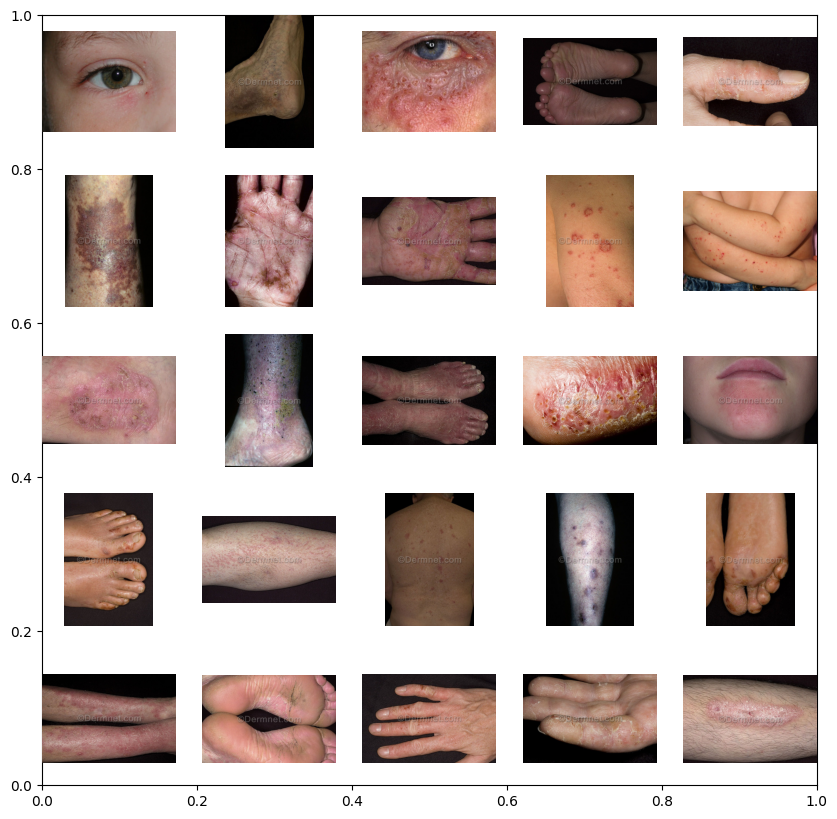

In [42]:

plt.subplots(figsize=(10,10))
for i in range(len(Eczema)):
    plt.subplot(5,5,i+1)
    img=plt.imread(Eczema.iloc[i])
    plt.imshow(img)
    plt.axis("off")

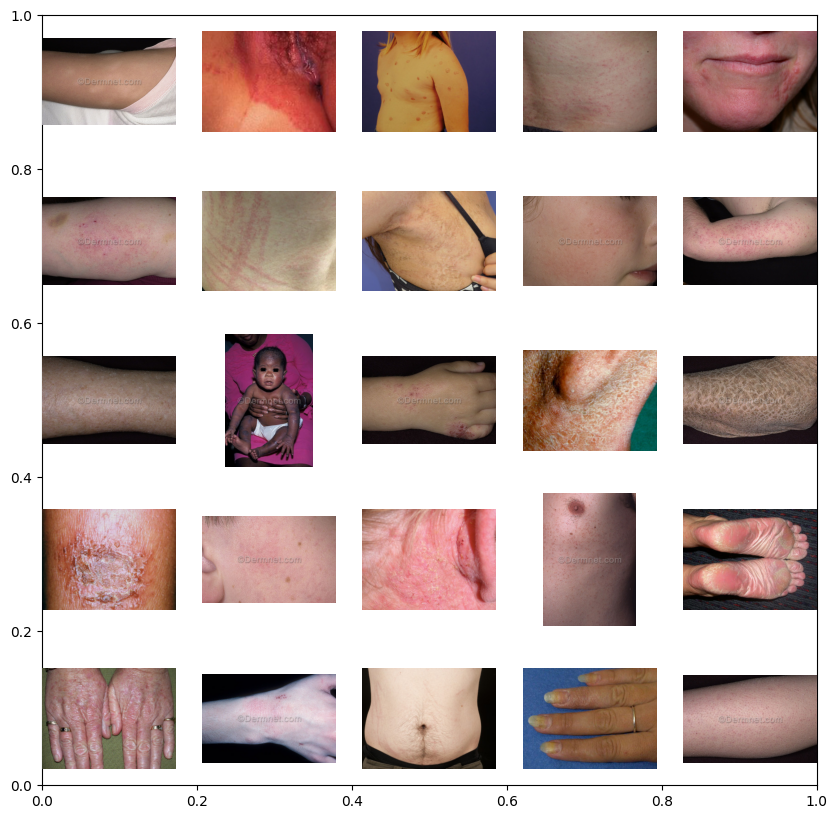

In [43]:

plt.subplots(figsize=(10,10))
for i in range(len(Atopic_Dermatitis)):
    plt.subplot(5,5,i+1)
    img=plt.imread(Atopic_Dermatitis.iloc[i])
    plt.imshow(img)
    plt.axis("off")

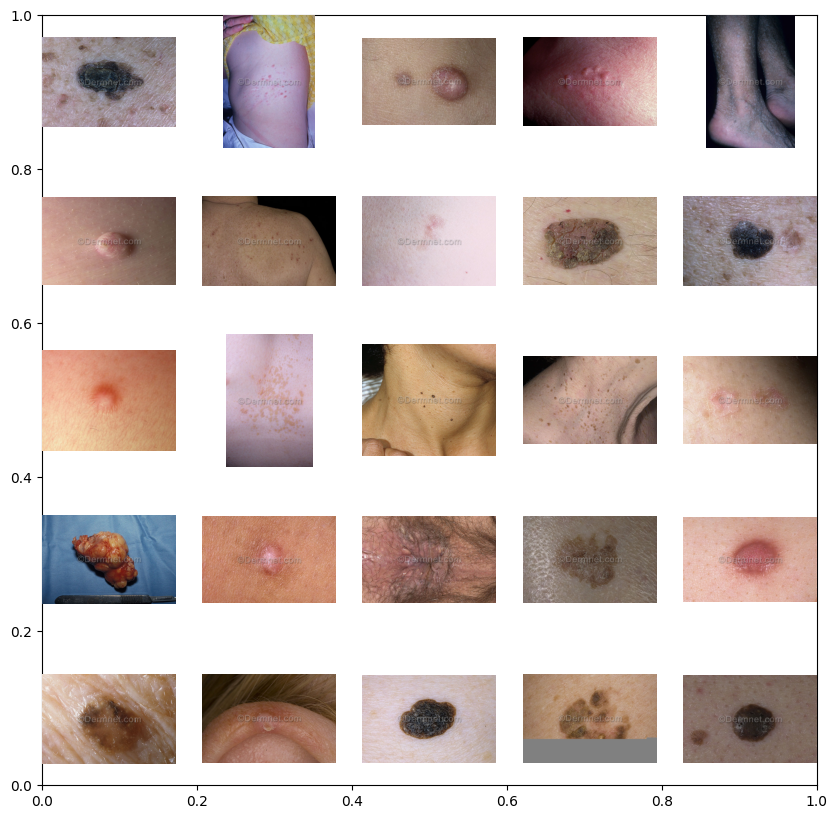

In [44]:
#Seborrheic_Keratoses

plt.subplots(figsize=(10,10))
for i in range(len(Seborrheic_Keratoses)):
    plt.subplot(5,5,i+1)
    img=plt.imread(Seborrheic_Keratoses.iloc[i])
    plt.imshow(img)
    plt.axis("off")

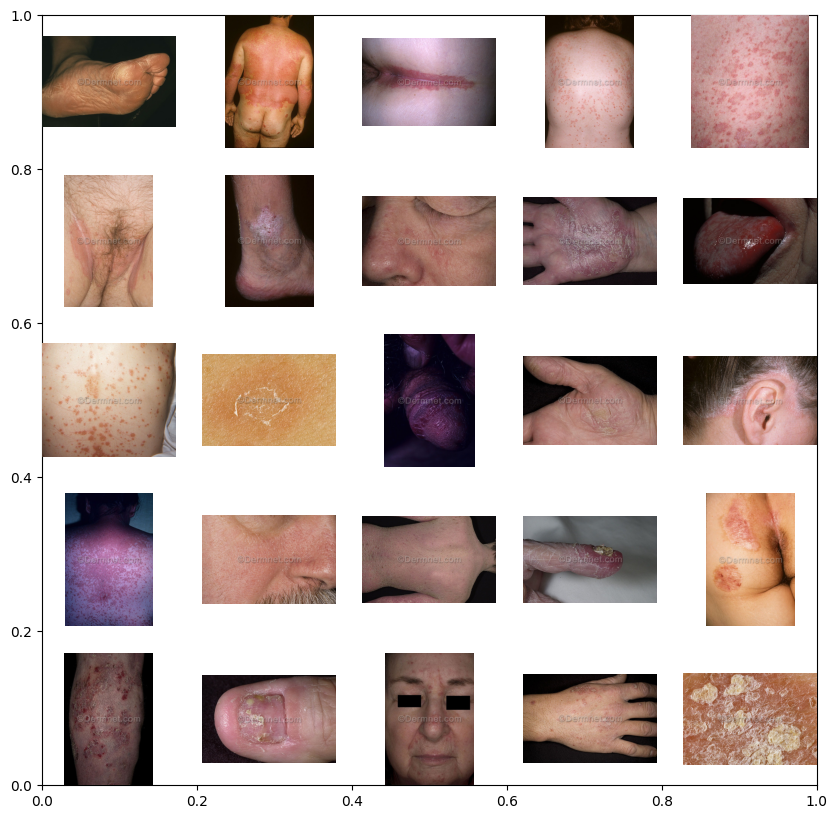

In [45]:
#Psoriasis_pictures

plt.subplots(figsize=(10,10))
for i in range(len(Psoriasis_pictures)):
    plt.subplot(5,5,i+1)
    img=plt.imread(Psoriasis_pictures.iloc[i])
    plt.imshow(img)
    plt.axis("off")


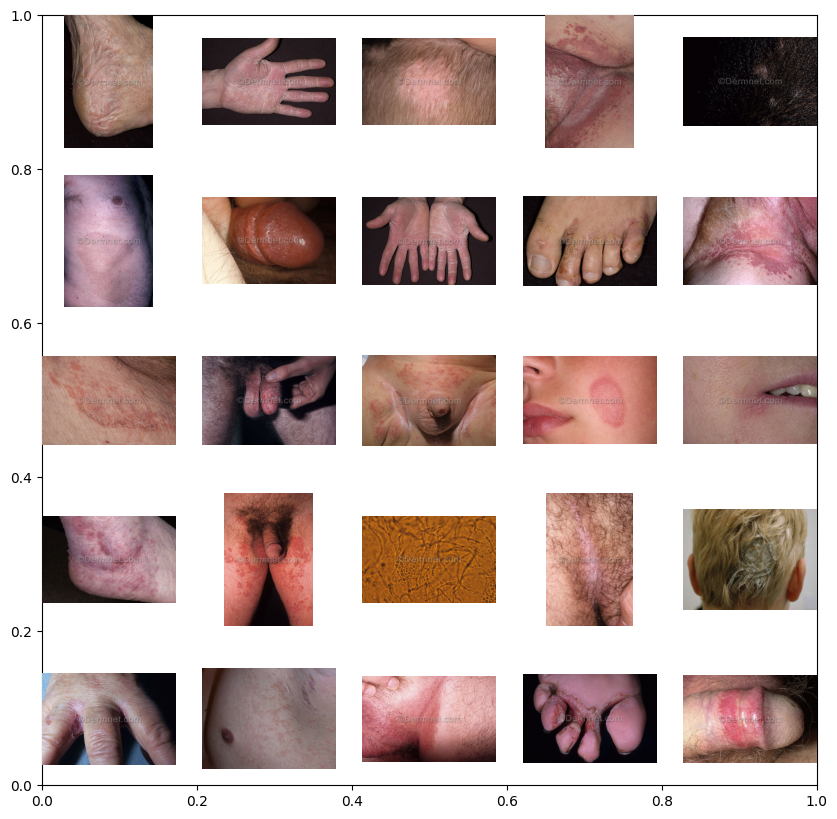

In [46]:
#Tinea_Ringworm
plt.subplots(figsize=(10,10))
for i in range(len(Tinea_Ringworm)):
    plt.subplot(5,5,i+1)
    img=plt.imread(Tinea_Ringworm.iloc[i])
    plt.imshow(img)
    plt.axis("off")


In [51]:
#Seprate X and y
X = df["input_path"]
y = df["labels"]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (6830,)
X_test shape: (1708,)
y_train shape: (6830,)
y_test shape: (1708,)


In [56]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16,preprocess_input
from keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image

In [55]:

train_gen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)
test_gen = ImageDataGenerator(
    rescale = 1./255
)

train_iterator = train_gen.flow_from_dataframe(
    dataframe = df,
    x_col = "input_path",
    y_col = "labels",
    target_size = (224,224),
    batch_size = 32,
    class_mode = "sparse",
    shuffle = True
)
test_data = test_gen.flow_from_dataframe(
    dataframe = df,
    x_col = "input_path",
    y_col = "labels",
    target_size = (224,224),
    batch_size = 32,
    class_mode = "sparse",
    shuffle = True
)

Found 8538 validated image filenames belonging to 5 classes.
Found 8538 validated image filenames belonging to 5 classes.


In [ ]:
#to check the data after data augmentation
x_data,y_data = train_iterator.next()
x_data.shape,y_data.shape

In [57]:
vgg = VGG16()

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [58]:
Model = Sequential()
for layer in vgg.layers[:-1]:
    Model.add(layer)

In [59]:
vgg.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [61]:
#Now freeze the trainable params
for layer in Model.layers:
    layer.trainable = False
Model.summary() #existing weight are freeez

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc2 (Dense)                          │ (None, 4096)                │      16,781,312 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 134,260,544 (512.16 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 134,260,544 (512.16 MB)

In [72]:
Model.add(Dense(128,activation="relu",kernel_regularizer=keras.regularizers.l1()))
Model.add(Dropout(0.5))
Model.add(Dense(5,activation="softmax"))
Model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc2 (Dense)                          │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 135,922,021 (518.50 MB)

 Trainable params: 576,783 (2.20 MB)

 Non-trainable params: 134,260,544 (512.16 MB)

 Optimizer params: 1,084,694 (4.14 MB)

In [64]:
Model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
history = Model.fit(train_iterator,epochs=5,validation_data=test_data)

Epoch 1/10
140/267 ━━━━━━━━━━━━━━━━━━━━ 13:32 6s/step - accuracy: 0.2424 - loss: 1.5961

In [ ]:
#Graph between train_accuracy and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

#graph between train_loss and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

In [ ]:
#save the model
Model.save("model.h5")

#Dont try to copy from chatgpt unless you dont know how to handle thing.
